In [24]:
#import libraries
import pandas as pd
from pandas import read_csv 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense 
from sklearn.model_selection import train_test_split

In [13]:
#get data
df = read_csv("Dome_Proj.csv", header=0)
print(df.head())
X = df[['r/d','D/d']]
Y = df[['k']]
print(X.head())
print(Y.head())

   Name     P1     P2         P3     r/d     D/d         k
0     1  2.500  55.00  21.992542  0.0500  1.1000  2.199254
1     2  2.535  55.19  23.135844  0.0507  1.1038  2.313584
2     3  2.570  55.38  22.989749  0.0514  1.1076  2.298975
3     4  2.605  55.57  22.145885  0.0521  1.1114  2.214589
4     5  2.640  55.76  24.995756  0.0528  1.1152  2.499576
      r/d     D/d
0  0.0500  1.1000
1  0.0507  1.1038
2  0.0514  1.1076
3  0.0521  1.1114
4  0.0528  1.1152
          k
0  2.199254
1  2.313584
2  2.298975
3  2.214589
4  2.499576


In [14]:
#test and train split of data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

In [15]:
#dnn model building
model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train, Y_train, validation_split=0.2, epochs =100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,865
Trainable params: 12,865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 3.4451 - mae: 1.8264 - val_loss: 1.9041 - val_mae: 1.3291
Epoch 2/100
10/10 [==============================]

In [26]:
#prediction on test data
predictions = model.predict(X_test)
prediction = pd.DataFrame(predictions, columns = ['Prediction'])
print("Predicted values are: ", prediction[:5])
print("Real values are: ", Y_test[:5])

4/4 [==============================] - 0s 3ms/step
Predicted values are:     Prediction
0    2.264012
1    2.425488
2    2.365677
3    2.014678
4    2.069610
Real values are:              k
226  2.166365
102  2.437514
148  2.362357
468  2.024476
389  2.102352


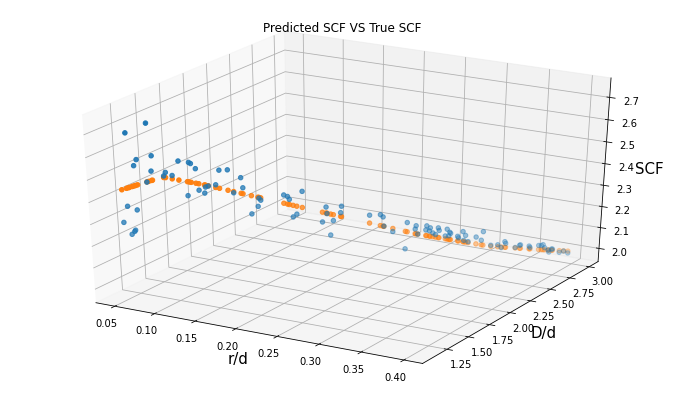

In [70]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.scatter3D(X_test['r/d'], X_test['D/d'], Y_test, cmap='Blues');
ax.scatter3D(X_test['r/d'], X_test['D/d'], predictions, cmap='Orange');
ax.set_xlabel('r/d',fontsize=15)
ax.set_ylabel('D/d',fontsize=15)
ax.set_zlabel('SCF', fontsize = 15);
ax = plt.title('Predicted SCF VS True SCF')

In [ ]:
#performance of model (mean absolute error)
mse_neural, mae_neural = model.evaluate(X_test, Y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 5ms/step - loss: 0.0044 - mae: 0.0399
Mean squared error from neural net:  0.004411804024130106
Mean absolute error from neural net:  0.03991720825433731


In [ ]:
#input from user
import array as arr
rd = float(input("Enter the ratio of radius of fillet and width of the small section: "))
Dd = float(input("Enter the ratio of width of the big section and width of the small section: "))
i = [[rd,Dd]]
#print()
print("Stress Concentration Factor: ",model.predict(i)[0][0])

Enter the ratio of radius of fillet and width of the small section: 0.06
Enter the ratio of width of the big section and width of the small section: 1.5
1/1 [==============================] - 0s 68ms/step
Stress Concentration Factor:  2.5974438
